<a href="https://colab.research.google.com/github/RebatiGaire/TensorflowInPractice/blob/master/imdb_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJN5B33/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJN5B33/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJN5B33/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
training_sentences = []
testing_sentences = []

training_labels = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 10000
max_length = 120
embedding_dim = 16
oov_token = '<OOV>'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequence = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded_sequences = pad_sequences(testing_sequences, maxlen = max_length)


In [7]:
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reversed_word_index.get(i, '?') for i in text])

print(decode_review(padded_sequence[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 64)           12544     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(padded_sequence, training_labels_final, epochs = 20, validation_data=(testing_padded_sequences, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 143s 183ms/step - loss: 0.4675 - accuracy: 0.7638 - val_loss: 0.3584 - val_accuracy: 0.8432
Epoch 2/20
782/782 [==============================] - 140s 179ms/step - loss: 0.2974 - accuracy: 0.8810 - val_loss: 0.4047 - val_accuracy: 0.8232
Epoch 3/20
782/782 [==============================] - 140s 179ms/step - loss: 0.2374 - accuracy: 0.9084 - val_loss: 0.3898 - val_accuracy: 0.8390
Epoch 4/20
782/782 [==============================] - 141s 180ms/step - loss: 0.1755 - accuracy: 0.9360 - val_loss: 0.4274 - val_accuracy: 0.8266
Epoch 5/20
782/782 [==============================] - 141s 181ms/step - loss: 0.1191 - accuracy: 0.9564 - val_loss: 0.5312 - val_accuracy: 0.8228
Epoch 6/20
782/782 [==============================] - 141s 180ms/step - loss: 0.0777 - accuracy: 0.9731 - val_loss: 0.6295 - val_accuracy: 0.8213
Epoch 7/20
782/782 [==============================] - 141s 180ms/step - loss: 0.0559 - accuracy: 0.9808 - val_loss: 0.7513 -

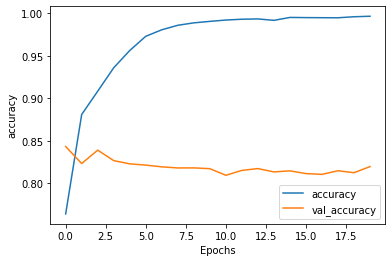

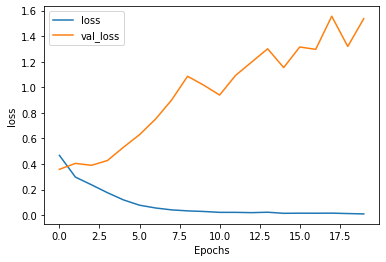

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

For IMDB Subwords 8K with 1D Convolutional Layer

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])